<a href="https://colab.research.google.com/github/Vinscavon/-system_egineering-devops/blob/master/Quest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import relevant libraries 
#!pip install osmnx
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal
import pyproj
import geopy
import cartopy as cp
import geojson
import osmnx as ox
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import bokeh
import folium
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/quest3")

Mounted at /content/quest3


In [ ]:
from google.colab import files
files.upload()

Saving .DS_Store to .DS_Store
Saving chicago_sup.dbf to chicago_sup.dbf
Saving chicago_sup.prj to chicago_sup.prj
Saving chicago_sup.shp to chicago_sup.shp
Saving chicago_sup.shx to chicago_sup.shx
Saving ChicagoBoundary.dbf to ChicagoBoundary.dbf
Saving ChicagoBoundary.prj to ChicagoBoundary.prj
Saving ChicagoBoundary.shp to ChicagoBoundary.shp
Saving ChicagoBoundary.shx to ChicagoBoundary.shx


{'.DS_Store': b'\x00\x00\x00\x01Bud1\x00\x00\x10\x00\x00\x00\x08\x00\x00\x00\x10\x00\x00\x00\x00%\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/quest3/MyDrive/gds_3.zip

Archive:  /content/quest3/MyDrive/gds_3.zip
replace __MACOSX/._gds_3? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace gds_3/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [ ]:
!mamba install -q -c conda-forge cartopy


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████

  Package              Version  Build                Channel                   Size
──────────────────────────────

# Quest 3: Visualising geospatial data 

In this final quest, we will focus on creating maps with multiple layers of geospatial data. In particular, we will cover the plotting tools offered by the matplotlib Python library, as well as interactive mapping with the folium library. 

Data sources:

- https://data.cityofchicago.org/

    - https://data.cityofchicago.org/Buildings/Building-Footprints-current-/hz9b-7nh8

    - https://data.cityofchicago.org/Parks-Recreation/Parks-Chicago-Park-District-Park-Boundaries-curren/ej32-qgdr

    - https://data.cityofchicago.org/Transportation/Major-Streets/ueqs-5wr6

## 1. Plotting with matplotlib
Source: https://matplotlib.org/

We have already seen matplotlib in action in _Quest 2: Exploring and manipulating geospatial data with geopandas_. Now, we will go through the process step-by-step using Chicago neighbourhood and supermarket data from the previous quest along with other datasets on Chicago's built environment.

#### Load your data. 
Note: _Operations involving the __Building Footprint__ dataset may take a while given the large file size._

`var_name = gpd.read_file("your filepath")`

In [ ]:
# Modify the code accordingly based on the location of your downloaded data #
neighbourhoods = gpd.read_file("/content/ComArea_ACS14_f.shp") # this file can be found in the gds_2 folder from Quest 2 
supermarkets = gpd.read_file("/content/chicago_sup.shp") # this file can be found in the gds_2 folder from Quest 2
buildings = gpd.read_file("/content/gds_3/chicago_data_2/Building_Footprint/bfootprint.shp")
streets = gpd.read_file("/content/gds_3/chicago_data_2/Major_Streets/Major_Streets.shp")
parks = gpd.read_file("/content/gds_3/chicago_data_2/Parks/Parks.shp")          

#### Create plot (axis) object for Chicago neighbourhoods.

You can customise plot parameters such as figure size `figsize`, feature colour `facecolor`/`edgecolor`, and more... (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). For now, just work with the parameters specified in the code.

Remember that your data must always be plotted on a defined axis object (in this case _ax_) for it to appear on your plot!

<AxesSubplot: >

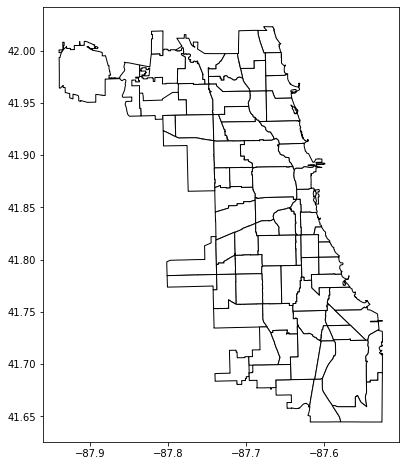

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
neighbourhoods.plot(ax = ax, facecolor = "white", edgecolor = "black")

#### Add supermarkets to the same plot.
Add the code `supermarkets.plot(ax = ax, facecolor = "blue")` to the cell below and run it.

<AxesSubplot: >

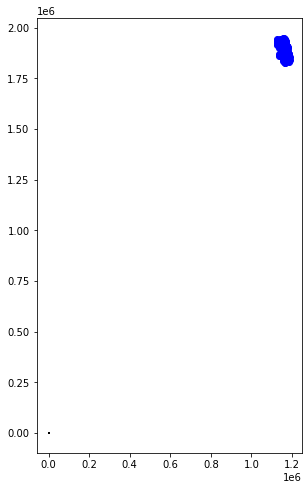

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
neighbourhoods.plot(ax = ax, facecolor = "white", edgecolor = "black")
supermarkets.plot(ax = ax, facecolor = "blue")
# replace this line with code to plot supermarkets #

**What problem are we facing here?** We see that the blue points (supermarkets) are in the top right corner of the plot, away from the Chicago neighbourhoods (black dot in the bottom left corner).

#### Inspect the CRS of the datasets _neighbourhoods_ and _supermarkets.
`var_name.crs`

In [ ]:
# replace this line with code to inspect the CRS of the neighbourhoods data #
neighbourhoods.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [ ]:
# replace this line with code to inspect the CRS of the supermarkets data #
supermarkets.crs

<Derived Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_GRS 1980( ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

**Remember:** We have learned that spatial data need to have the same CRS to be mapped together accurately!

#### So, reproject all datasets to EPSG:26916.

_Complete the code below. (Hint: Reprojections were covered in Quest 2.)_

In [ ]:
neighbourhoods = neighbourhoods.to_crs("EPSG:26916")
supermarkets = supermarkets.to_crs("EPSG:26916")
streets = streets.to_crs("EPSG:26916")
buildings = buildings.to_crs("EPSG:26916")
parks = parks.to_crs("EPSG:26916")

#### Now, replot the Chicago neighbourhoods and supermarkets.

<AxesSubplot: >

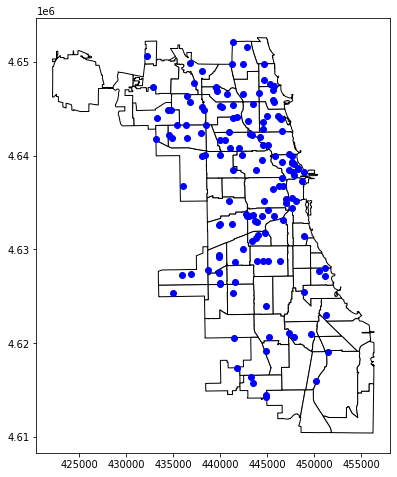

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
neighbourhoods.plot(ax = ax, facecolor = "white", edgecolor = "black")
supermarkets.plot(ax = ax, facecolor = "blue")

The neighbourhoods and supermarkets layers now show up correctly on our map.

### With all our data in order, we will now map the buildings across Chicago.
_**Note:** Given the size of the Building Footprint dataset, each plot will take approximately 2-3 minutes to render._

<AxesSubplot: >

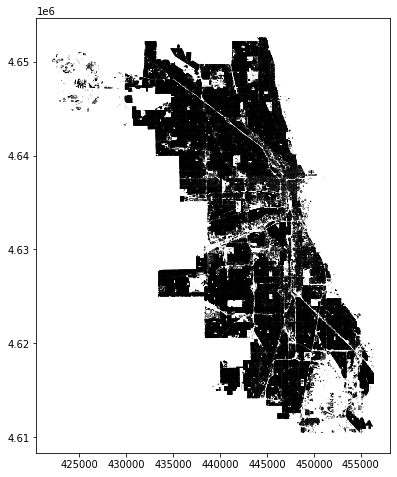

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
buildings.plot(ax = ax, edgecolor = "black", linewidth = 0.5, facecolor = "white")

There are way too many buildings for us to visualise them in a meaningful way at this scale...

#### So, let us zoom in on one section of Chicago by defining the _axis limits_ of our plot.

In [ ]:
xmin, xmax = 446500, 449500
ymin, ymax = 4636000, 4639000

#### Plot the map again and set the x/y limits for the axes.

(4636000.0, 4639000.0)

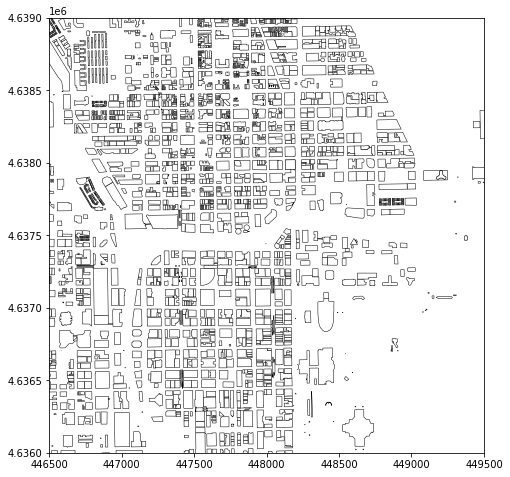

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
buildings.plot(ax = ax, edgecolor = "black", linewidth = 0.5, facecolor = "white")

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

Now we can see each building more clearly!

#### We can also colour the buildings based on various building attributes, e.g., based on the number of storeys/floors in the building.

In the code below, use the following parameters `column = "stories", cmap ="OrRd", legend = True`

(4636000.0, 4639000.0)

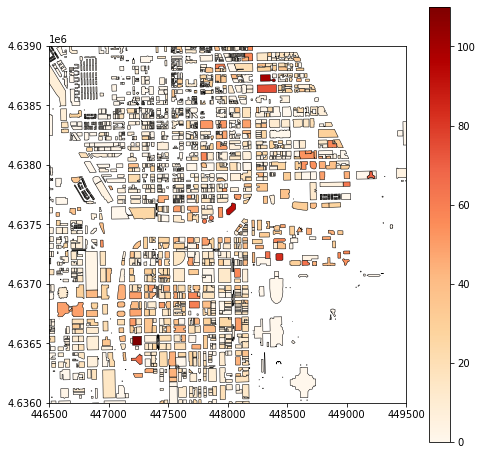

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
buildings.plot(ax = ax, edgecolor = "black", linewidth = 0.5, column = "stories", cmap = "OrRd", legend = True ) # complete the code #

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

As indicated by the legend on the right, the darker the orange/red colouring, the greater the number of floors in the building! From this map, we can see that most buildings in this part of Chicago have fewer than 40 storeys.

#### We can also add more context to the map by including additional features such as the main street network, pedestrian paths, and parks.

# ⓘ 
> By simultaneously mapping various features of the city, we can more easily spot relationships between them, identify locations that require attention depending on the problem at hand, and perform the necessary further analyses to address these problems. For example, by mapping the street network and parks across Chicago, urban planners can identify neighbourhoods with inadequate access to urban green spaces.


(4636000.0, 4639000.0)

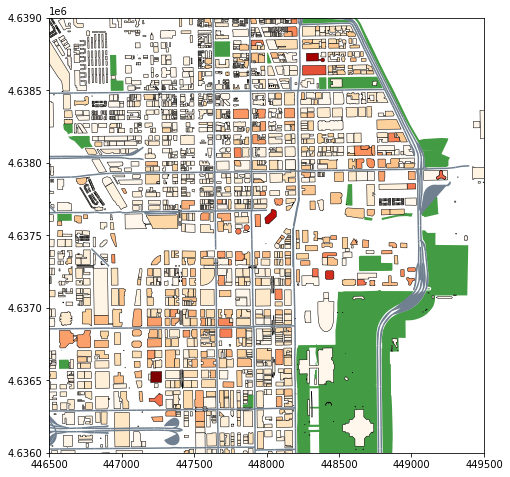

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
parks.plot(ax = ax, facecolor = 'forestgreen', alpha = 0.85)
buildings.plot(ax = ax, edgecolor = "black", linewidth=0.5, column="stories", cmap="OrRd", legend = False) # Hide the legend
streets.plot(ax = ax, facecolor = "slategray", edgecolor = "slategray")

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

### [QUEST DELIVERABLE] Add your StackUp username to the map and download it!

- Plot the same map as the one in the cell above (fill in missing portions of the code below)
    - Do not change any plot parameters (colours, axis limits) etc.
- Make sure that you use your __full username__ in the plot (edit the code accordingly)
- Right-click on your map and select "Save Image As..."
    - Name your map as follows: **CX_QY_1_YourUsername.png**
- Submit your map on the StackUp platform

(4636000.0, 4639000.0)

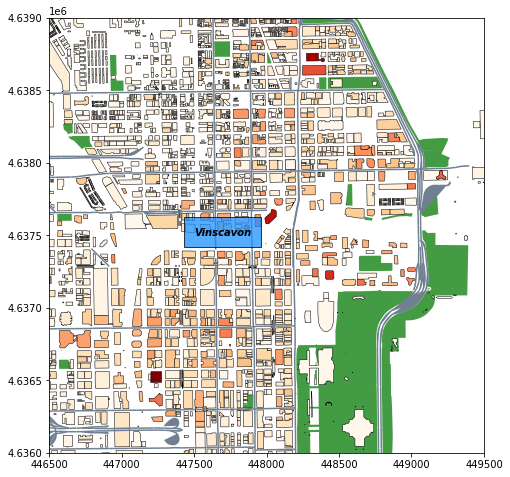

In [ ]:
# replace this line with code to initialise fig, ax variable #
# replace this line with code to plot parks #
fig, ax = plt.subplots(1,1, figsize = (8, 8))
parks.plot(ax = ax, facecolor = 'forestgreen', alpha = 0.85)

buildings.plot(ax = ax, edgecolor = "black", linewidth=0.5, column="stories", cmap="OrRd", legend = False) # Hide the legend
# replace this line with code to plot streets #
streets.plot(ax = ax, facecolor = "slategray", edgecolor = "slategray")
ax.text(447500, 4637500, 'Vinscavon', style='italic', weight = 'bold', bbox = {'facecolor': 'dodgerblue', 'alpha': 0.75, 'pad': 10})

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

## 2. Plotting with folium
Source: https://python-visualization.github.io/folium/

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.

To plot a basemap of your location of interest (in our case, Chicago), we need to pass latitude (lat) and longitude (long) parameters to the `folium.Map()` function.

#### Create a new gdf with the lat/lon info of Chicago neighbourhoods.

Folium requires the lat/lon parameters to be specified in a geographic CRS format, so we also have to reproject the lat/lon computed in the previous step (given in projected CRS format). Here we will reproject it to __EPSG:4326__ that is a latitude/longitude based CRS used by GPS.

It is also useful to remember that latitude = y-coordinate and longitude = x-coordinate.

In [ ]:
nbhd_locations = neighbourhoods
nbhd_locations = nbhd_locations.to_crs("EPSG:4326") 
nbhd_locations['lat'] = (nbhd_locations.centroid.y)
nbhd_locations['lon'] = (nbhd_locations.centroid.x) 
nbhd_locations.head()

ComAreaID        community  TRACTCnt    shape_area     shape_len  Pop2012  \
0         35          DOUGLAS        10  4.600462e+07  31027.054510    18238   
1         36          OAKLAND         3  1.691396e+07  19565.506153     5918   
2         37      FULLER PARK         2  1.991670e+07  25339.089750     2876   
3         38  GRAND BOULEVARD        14  4.849250e+07  28196.837157    21929   
4         39          KENWOOD         7  2.907174e+07  23325.167906    17841   

   Pop2014  PopChng  PopM    PopMP  ...  ProstateC  Stroke  ChlBLLS  ChlLeadP  \
0    19430   3.1645  8294  42.6866  ...       85.5    62.1    482.2         0   
1     6473   4.4791  2499  38.6065  ...       54.2    43.7    435.4         0   
2     2543  -6.1450  1218  47.8962  ...       70.5    82.4    489.9         2   
3    22531   1.3540  9681  42.9675  ...       39.0    46.7    590.4         1   
4    18217   1.0428  8543  46.8958  ...       46.2    31.5    397.9         0   

   GonorrF  GonorrM  Tuberc  \
0   1063.3    727.4     4.2   
1   1655.4   1629.3     6.7   
2   1061.9   1556.4     0.0   
3   1454.6   1680.0    13.2   
4    610.2    549.1     0.0   

                                            geometry        lat        lon  
0  POLYGON ((-87.60914 41.84469, -87.60915 41.844...  41.835118 -87.618678  
1  POLYGON ((-87.59215 41.81693, -87.59231 41.816...  41.823750 -87.603216  
2  POLYGON ((-87.62880 41.80189, -87.62879 41.801...  41.809085 -87.632425  
3  POLYGON ((-87.60671 41.81681, -87.60670 41.816...  41.812949 -87.617860  
4  POLYGON ((-87.59215 41.81693, -87.59215 41.816...  41.808916 -87.596184  

[5 rows x 89 columns]

#### Create folium basemap with lat/lon information.
__Note:__ It is recommended to create/re-initialise your basemap for every plot you make.

In [ ]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
               zoom_start=12, 
               tiles='cartodbpositron', 
               control_scale=True)
m

This gives a blank map centered on Chicago and displayed at zoom level 12. 

You can __zoom in/out__ (with the buttons in the top left corner or with the scroll wheel on your mouse) and __pan__ the map (click > hold > drag > drop) directly in the map window. 

You can also customise the choice of map tile used with the `tiles` parameter. See https://python-visualization.github.io/folium/modules.html for more information. In this quest we will use the _cartodbpositron_ tiler option that gives us a basemap in grayscale.

#### Now we can add layers of data to this base map. Let's start with supermarket locations.
Remember, we need to compute the lat/lon of each supermarket in geographic CRS format before passing it to the map. Refer to the previous example on computing neighbourhood latitude/longitude and complete the code below.

Point data can be added to the map as markers using `folium.Marker()`

In [ ]:
supermarket_locations = supermarkets[["Chain", "geometry"]]
supermarket_locations = supermarket_locations.to_crs("EPSG:4326") 
supermarket_locations['lat'] = (supermarket_locations.centroid.y)
supermarket_locations['lon'] = (supermarket_locations.centroid.x)
supermarket_locations.head()

Chain                         geometry        lat        lon
0      VIET HOA PLAZA  MULTIPOINT (-87.65661 41.97321)  41.973210 -87.656613
1   COUNTY FAIR FOODS  MULTIPOINT (-87.68136 41.69713)  41.697131 -87.681361
2  WHOLE FOODS MARKET  MULTIPOINT (-87.63918 41.86847)  41.868471 -87.639185
3        TARGET/SUPER  MULTIPOINT (-87.65495 41.87783)  41.877830 -87.654948
4         FOOD 4 LESS  MULTIPOINT (-87.62715 41.73623)  41.736225 -87.627146

In [ ]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=12, tiles='cartodbpositron', control_scale=True)

for i, location in supermarket_locations.iterrows():
    folium.Marker([location["lat"], location["lon"]], popup=location["Chain"]).add_to(m)

m

If we click on any of the markers on the map, a pop-up with the name of supermarket chain at that particular location will appear!

We can also visualise polygon layers (e.g. neighbourhood boundaries) on the map by passing them to the map as an __overlay__. Multiple polygon layers can be visualised on a single map in this way.

Note that such polygon layers must be passed to the map in GeoJSON (or TopoJSON) format, i.e., `folium.GeoJson()`

#### Now we will add neighbourhood boundaries (polygons) to our map. 

First we need to convert our geodataframe to geojson using the function `gdf.to_json()`

In [ ]:
neighbourhoods_geo = nbhd_locations.to_json()

Then we can add this layer as an overlay to the map using `folium.Geojson()`

We can also add a button to toggle this layer on/off with the code `folium.LayerControl`

In [ ]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=12, tiles='cartodbpositron', control_scale=True)
folium.GeoJson(neighbourhoods_geo, name="Boundaries").add_to(m)
folium.LayerControl().add_to(m)
m

We can now see the neighbourhood boundaries drawn on the map! With the toggle button (top right corner), we can also choose whether or not we want this layer to be displayed. Try it out!

#### We can also easily create choropleth maps using folium.
Choropleth maps provide an easy way to visualize how a variable varies across a geographic area or show the level of variability within a region. They are thematic maps with areas shaded or patterned in proportion to the measurement of the variable of interest. 

Choropleth maps can be added to your folium basemap using the `folium.Choropleth()` function, to which a geojson object (**geo_data**) containing the polygon boundaries AND a dataframe/table (**data**) containing the variable(s) of interest must be passed. A key (**key_on**) that is a common attribute column shared between the **geo_data** and **data* objects will link the two datasets.

Now, we will map the number of violent crime cases across Chicago for the year 2014. We will also add a tooltip using `folium.GeoJsonTooltip()`, that will display the neighbourhood name (_community_) and the number of violent crimes (*Violent_C*) when you hover over any neighbourhood.

# ⓘ 
> Choropleth maps of socioeconomic indicators, such as violent crime rates, are useful for policymakers to visualise how such indicators vary across the city, and easily identify area(s) in need of attention. Also, it may reveal other patterns such as spatial clustering, where for example, high-crime neighbourhoods are geographically clustered with other high-crime neighbourhoods. 

In [ ]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=12, tiles='cartodbpositron', control_scale=True)

cp = folium.Choropleth( # create choropleth map object
    name = "Violent crimes (2014)", # specify name for your overlay layer
    geo_data = neighbourhoods_geo, # geojson object containing your polygon boundaries
    data = neighbourhoods, # dataframe containing your statistical variables
    columns = ["community", "Violent_C"], # relevant columns from your data table
    key_on = "feature.properties.community", # key that is shared between both geo_data and data
    fill_color = "OrRd", # polygon colour palette
    fill_opacity = 0.7, # polygon colour opacity
    line_opacity = 0.2, # polygon line opacity
    legend_name = "Violent crimes").add_to(m) # name of legend

folium.GeoJsonTooltip(['community', 'Violent_C']).add_to(cp.geojson) # Note that the tooltip must be added to the choropleth map geojson object and NOT the basemap!

folium.LayerControl().add_to(m) # add toggle button for this layer

m

### Now it's your turn! Create a choropleth map showing how the per capita income varies across Chicago.

__Consider the following:__

- First create the basemap object, m, using `folium.Map()`
    - Start with a zoom level of __10__ for the base map
- Follow the example above on violent crimes and compete the code to create __cp2__, the `folium.Choropleth` object
- Use `geodata_data = neighbourhoods_geo` and `data = neighbourhoods`
    - The __'PerCInc14'__ column in the _neighbourhoods_ dataset provides data on the per capita income that we want to plot
- Use the __'PiYG'__ colour palette for this map
- Include a tooltip displaying the community name (_community_) and per capita income (_PerCInc14_) with `folium.GeoJsonToolTip`
    - Remember to add the tooltip to the __choropleth map geojson object, cp2__ and not the basemap!
- Include a toggle button for the layer with `folium.LayerControl()` and add it to the basemap

*Refer to the example above on violent crimes if you need help!*

In [39]:
m =  folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=10, tiles='cartodbpositron', control_scale=True)

cp2 = folium.Choropleth(
    name = "Per capita income (2014)",
    geo_data = neighbourhoods_geo,
    data = neighbourhoods,
    columns = ["community", "PerCInc14"],
    key_on = "feature.properties.community",
    fill_color = 'PiYG',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "USD/year").add_to(m)

# replace this line with code to add a tooltip showing information on community name and the per capita income #
folium.GeoJsonTooltip(['community', 'PerCInc14']).add_to(cp.geojson)
# replace this line with code to add a toggle button for the choropleth map layer #
folium.LayerControl().add_to(m)
m

### [QUEST DELIVERABLE] Take a screenshot of your choropleth map! 

Follow these instructions carefully:
- Hover over the neighbourhood with the **highest per capita income (the darkest green polygon)and note down its _PerCInc14_ value** as you will need it for your deliverable.
- Take a screenshot of the entire cell containing the map
- Name your screenshot as follows: **CX_QY_*PerCInc14*_YourUsername.png**
    - In the file name, **replace PerCInc14** with the value you have noted down in the first step
    - Your submission will be **REJECTED** if it does not follow the exact naming format shown above
- Submit your screenshot on the StackUp platform

### Well done!

We’ve come to the end of this quest where you:

   1. Created maps with multiple data layers using _matplotlib_
   2. Created interactive maps with _folium_

Now go back to the StackUp website to prepare your deliverables for submission!